In [2]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [4]:
path = 'LondonBikeJourneyAug2023.csv'
df = pd.read_csv(path)
df.head(10)

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms)
0,132825189,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663
1,132825190,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128
2,132825191,8/1/2023 0:00,983,"Euston Road, Euston",8/1/2023 0:11,3500,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395
3,132825192,8/1/2023 0:01,3479,"Old Brompton Road, South Kensington",8/1/2023 0:12,1140,"Grosvenor Road, Pimlico",53431,CLASSIC,11m 53s,713059
4,132825193,8/1/2023 0:01,1219,"Lower Marsh, Waterloo",8/1/2023 0:17,200056,"Vauxhall Walk, Vauxhall",54758,CLASSIC,16m 3s,963786
5,132825194,8/1/2023 0:01,1219,"Lower Marsh, Waterloo",8/1/2023 0:08,1205,"Black Prince Road, Vauxhall",52921,CLASSIC,7m 45s,465422
6,132825195,8/1/2023 0:01,200120,"Grant Road East, Clapham Junction",8/1/2023 0:04,200126,"Usk Road, Clapham Junction",59224,CLASSIC,3m 26s,206583
7,132825196,8/1/2023 0:01,200155,"Gascoyne Road, Victoria Park",8/1/2023 1:04,3469,"Cadogan Place, Knightsbridge",61178,PBSC_EBIKE,1h 2m 58s,3778515
8,132825197,8/1/2023 0:01,300202,"Kings Gate House, Westminster",8/1/2023 0:18,1210,"Nevern Place, Earl's Court",51757,CLASSIC,17m 5s,1025908
9,132825198,8/1/2023 0:01,1154,"Kennington Road , Vauxhall",8/1/2023 0:09,1093,"Kennington Cross, Kennington",53424,CLASSIC,7m 16s,436692


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776527 entries, 0 to 776526
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Number                776527 non-null  int64 
 1   Start date            776527 non-null  object
 2   Start station number  776527 non-null  int64 
 3   Start station         776527 non-null  object
 4   End date              776527 non-null  object
 5   End station number    776527 non-null  int64 
 6   End station           776527 non-null  object
 7   Bike number           776527 non-null  int64 
 8   Bike model            776527 non-null  object
 9   Total duration        776527 non-null  object
 10  Total duration (ms)   776527 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 65.2+ MB


In [6]:
df.isnull().sum()

Number                  0
Start date              0
Start station number    0
Start station           0
End date                0
End station number      0
End station             0
Bike number             0
Bike model              0
Total duration          0
Total duration (ms)     0
dtype: int64

In [7]:
# Those are the start stations counts sum
df['Start station'].value_counts()


Start station
Hyde Park Corner, Hyde Park                      7437
Black Lion Gate, Kensington Gardens              4439
Waterloo Station 3, Waterloo                     4185
Albert Gate, Hyde Park                           4169
Wormwood Street, Liverpool Street                3899
                                                 ... 
Here East South, Queen Elizabeth Olympic Park     102
Clapham South, Clapham South                       96
Colet Gardens, Hammersmith                         94
Sackville Street, Mayfair                          66
Great Suffolk Street, The Borough                  60
Name: count, Length: 800, dtype: int64

In [8]:
#unique station lenght
unique_station = len(df['Start station'].unique())
print(f'Total Unique Station: {unique_station}')

Total Unique Station: 800


In [9]:
#total 
sum(df['Start station'].value_counts())

776527

In [10]:
#min and max duration
#This expression converts the ride duration from milliseconds to minutes 
#by dividing each value in the 'Total duration (ms)' column by 60,000 (since there are 60,000 milliseconds in a minute).

min_dur = min(df['Total duration (ms)'] / 60000)
max_dur = max(df['Total duration (ms)'] / 60000)
print(f'Max Duration {max_dur}\nMin Duration {min_dur}')

Max Duration 124031.79743333334
Min Duration 0.02178333333333333


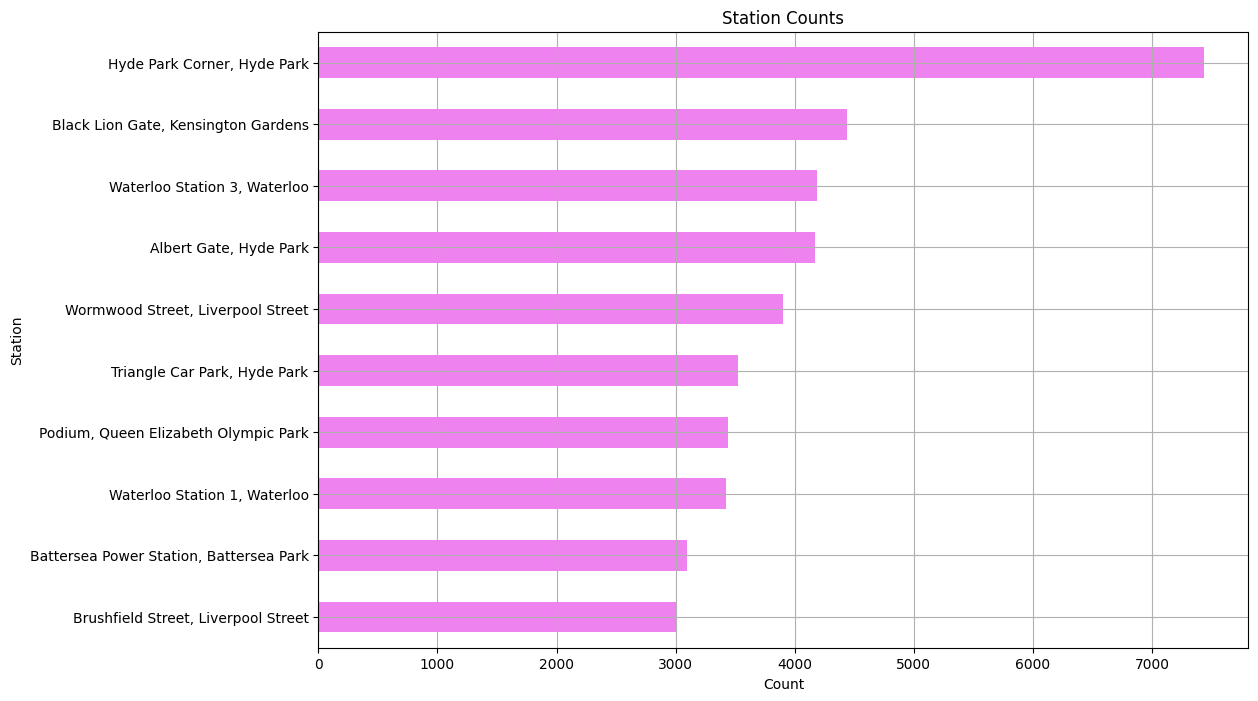

In [11]:
#Top 10 Station chosen by bikers 
stations = df['Start station'].value_counts().head(10)

# Sort the top 10 stations by max duration in ascending order
stations_sorted = stations.sort_values(ascending=True)

# Plotting
plt.figure(figsize=(12,8))
stations_sorted.plot(kind='barh', color='violet')

plt.xlabel('Count')
plt.ylabel('Station')
plt.title('Station Counts')
plt.grid(True)

plt.show()


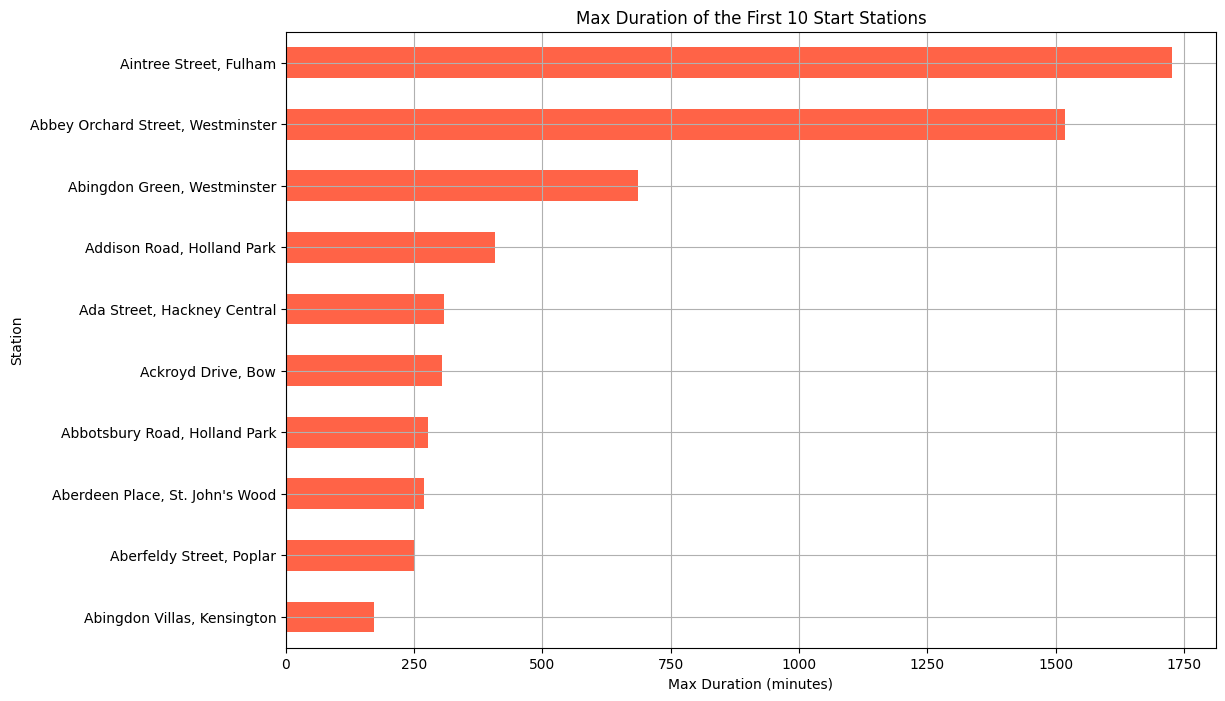

In [12]:
# Calculate max duration for each start station
max_durations = df.groupby('Start station')['Total duration (ms)'].max() / 60000  # Convert to minutes

# Select the first 10 stations
top_10_stations = max_durations.head(10)

# Sort the top 10 stations by max duration in ascending order
top_10_stations_sorted = top_10_stations.sort_values(ascending=True)

# Plotting
plt.figure(figsize=(12, 8))
top_10_stations_sorted.plot(kind='barh', color='tomato')

plt.xlabel('Max Duration (minutes)')
plt.ylabel('Station')
plt.title('Max Duration of the First 10 Start Stations')
plt.grid(True)

plt.show()

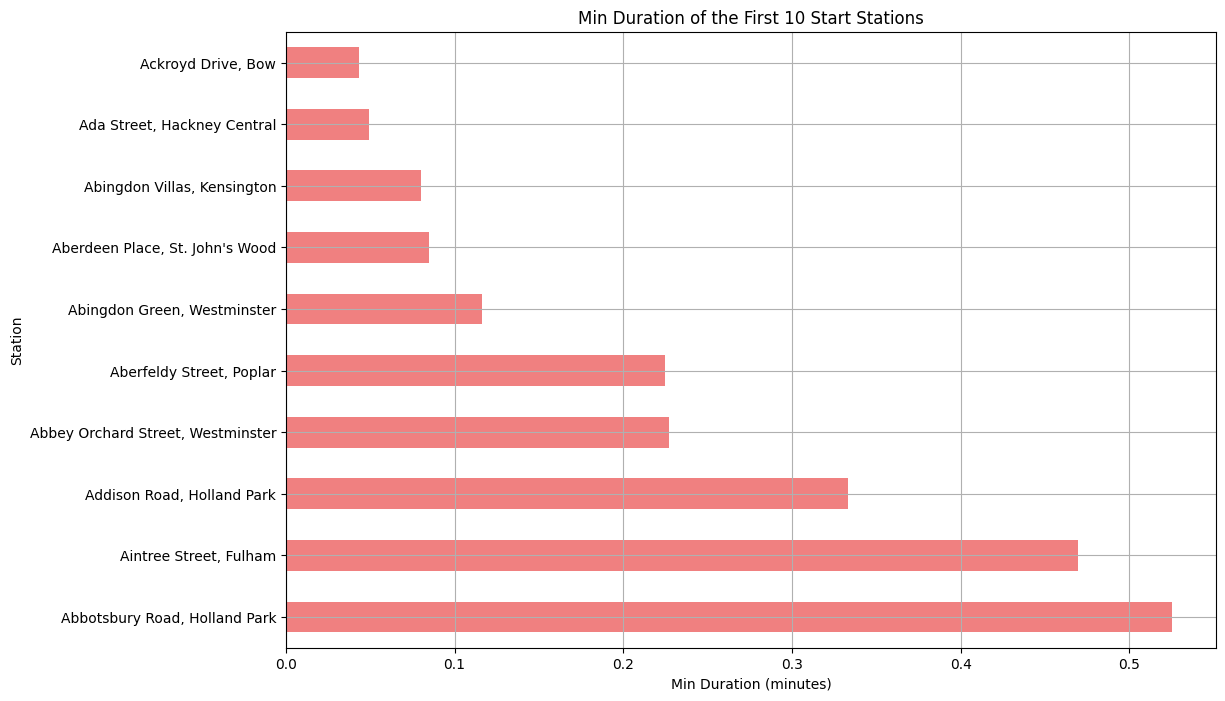

In [13]:
# Calculate min duration for each start station
min_durations = df.groupby('Start station')['Total duration (ms)'].min() / 60000  # Convert to minutes

# Select the first 10 stations
bottom_10_stations = min_durations.head(10)

# Sort the top 10 stations by max duration in ascending order
bottom_10_stations_sorted = bottom_10_stations.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
bottom_10_stations_sorted.plot(kind='barh', color='lightcoral')

plt.xlabel('Min Duration (minutes)')
plt.ylabel('Station')
plt.title('Min Duration of the First 10 Start Stations')
plt.grid(True)

plt.show()

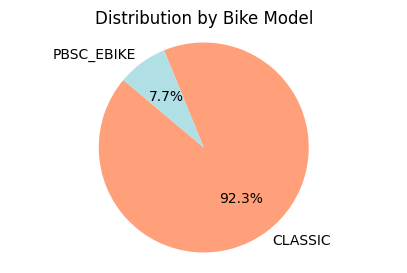

In [14]:
bike = df['Bike model'].value_counts()

plt.figure(figsize=(5, 3))  # Set the size of the figure
plt.pie(bike, labels=bike.index, autopct='%1.1f%%', startangle=140,  colors= [ 'lightsalmon', 'powderblue'])

plt.axis('equal')
plt.title('Distribution by Bike Model')
plt.show()
